# 第七次课后练习

**负责助教：胡天成**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第七次课后练习+姓名+学号.ipynb, 例如 第七次课后练习+张三+1000000000.ipynb</span>

<span style="color:red; font-weight:bold;">在作业过程中觉得有心得或者自己拓展学习到有价值内容的，可以在文件名最后加一个#号。例如第六次课后练习+张三+1000000000+#.ipynb</span>

# 第零部分 代码理解

请认真阅读代码，理解代码的功能，先写出预想的结果。运行并检验结果是否如预期。如果不如预期，请分析理解其中的原因

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **0.1** Numpy条件筛选

In [3]:
A = np.array([[ 3, -2,  0,  7, -5],
              [ 0,  4, -1,  9, -8],
              [ 6, -3,  2,  0, -4],
              [ 1, -7,  5, -6,  0],
              [ 8, -9,  0,  3, -2]])

# 使用 np.where 实现条件替换
result = np.where(A > 0, 1, np.where(A < 0, -1, A))

print(result)

[[ 1 -1  0  1 -1]
 [ 0  1 -1  1 -1]
 [ 1 -1  1  0 -1]
 [ 1 -1  1 -1  0]
 [ 1 -1  0  1 -1]]


预期结果为
```
[[ 1 -1  0  1 -1]
 [ 0  1 -1  1 -1]
 [ 1 -1  1  0 -1]
 [ 1 -1  1 -1  0]
 [ 1 -1  0  1 -1]]
```
实际与预期相符. 替换部分将 A 中的整数换为 1, 负数替换为 -1, 0不变.

In [4]:
import numpy as np

B = np.array([[0.1, 0.4, 0.8, 0.2],
              [0.5, 0.6, 0.9, 0.3],
              [0.7, 0.2, 0.1, 0.5],
              [0.4, 0.8, 0.6, 0.0]])

# 使用 np.clip 实现范围限制
result = np.clip(B, 0.3, 0.7)

print(result)

[[0.3 0.4 0.7 0.3]
 [0.5 0.6 0.7 0.3]
 [0.7 0.3 0.3 0.5]
 [0.4 0.7 0.6 0.3]]


预期结果为
```
[[0.3 0.4 0.7 0.3]
 [0.5 0.6 0.7 0.3]
 [0.7 0.3 0.3 0.5]
 [0.4 0.7 0.6 0.3]]
```
实际与预期相符. 范围限制会将小于 0.3 的数变成 0.3, 大于 0.7 的数变成 0.7.

In [7]:
arr = np.array([[0, 1, 11],
                [6, 5, 6],
                [7, 2, 9]])

idx = np.where(arr > 5)
print(idx)
print(np.extract(arr>5, arr))
print(arr.clip(2, 7))
print(arr[idx])

(array([0, 1, 1, 2, 2], dtype=int64), array([2, 0, 2, 0, 2], dtype=int64))
[11  6  6  7  9]
[[2 2 7]
 [6 5 6]
 [7 2 7]]
[11  6  6  7  9]


预期结果为
```
(array([0, 1, 1, 2, 2]), array([2, 0, 2, 0, 2]))
[11  6  6  7  9]
[[2 2 7]
 [6 5 6]
 [7 2 7]]
[11  6  6  7  9]
```
实际与预期相符. `np.where`输出所有大于 5 的项的索引, `extract`将提取出所有大于 5 的元素, 第三行将限制元素的值在 2 到 7 之间. 第四行输出大于 5 的元素的值.

## **0.2** 数据分布的中心化、标准化

In [10]:
np.random.seed(2023)
data = np.random.normal(loc=[5.0, 20.0],  
                        scale=[2.0, 5.0], 
                        size=(1000, 2))   

centered_data = data - data.mean(axis=0)
print(centered_data.shape)
data

(1000, 2)


array([[ 6.42334706, 18.37757522],
       [ 2.99625872, 21.18125397],
       [ 4.79568032, 14.29353687],
       ...,
       [ 6.61171657, 23.08123449],
       [ 3.29486106, 26.55732137],
       [ 3.7378763 , 15.75464219]])

预期结果为
```
(1000, 2)
array([[ 6.42334706, 18.37757522],
       [ 2.99625872, 21.18125397],
       [ 4.79568032, 14.29353687],
       ...,
       [ 6.61171657, 23.08123449],
       [ 3.29486106, 26.55732137],
       [ 3.7378763 , 15.75464219]])
```
实际与预期相符. 这段代码生成一个形状为 (1000, 2) 的数组, 第一列均值（loc）为 5.0, 标准差（scale）为 2.0; 第二列均值为 20.0，标准差为 5.0, 随后减去均值使数据中心化. 

In [12]:
std_data = (data - data.mean(axis=0)) / data.std(axis=0)
print(round(std_data[:, 1].std(), 2))
print(np.round(centered_data.mean(axis=0), 3))

1.0
[0. 0.]


预期结果为
```
1.0
[0. 0.]
```
实际与预期相符. 这段代码第一行对数据进行标准化, 随后验证第二列的标准差是否为1, 再验证中心化后数据 centered_data 的每列均值是否为 0.

## **0.3** 矩阵的特征值与特征向量

In [13]:
# 认真理解代码的意思，观察理解运行结果
# 生成二维数据
np.random.seed(2023)
X = np.random.multivariate_normal(
    mean=[5, 20], 
    cov=[[4, 3], [3, 9]],  # 协方差矩阵
    size=200
)

# 数据预处理
centered_X = X - X.mean(axis=0)
cov_matrix = centered_X.T @ centered_X / (X.shape[0]-1)  
print(cov_matrix)

[[ 4.24251943  3.45521972]
 [ 3.45521972 10.23049968]]


预期结果为协方差矩阵, 实际与预期相符. 两个维度的均值分别为 5 和 20, 对于协方差矩阵, 第一个维度的方差为4 (对角线元素) , 第二个维度的方差为9, 协方差为 3, 表示两个维度正相关, 随后进行中心化并计算样本协方差矩阵. 

In [26]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(eig_vecs)

[[-0.90963286 -0.41541312]
 [ 0.41541312 -0.90963286]]


预期结果为
```
[[-0.90963286 -0.41541312]
 [ 0.41541312 -0.90963286]]
```
实际与预期相符. 这里是在计算特征值与特征向量. 

Text(0.5, 1.0, 'Eigenvectors Visualization')

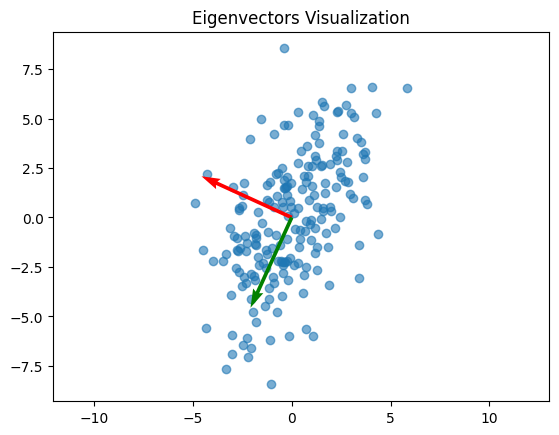

In [27]:
plt.scatter(centered_X[:,0], centered_X[:,1], alpha=0.6)
origin = [0,0]
plt.quiver(*origin, *eig_vecs[:,0], color='r', scale=5)
plt.quiver(*origin, *eig_vecs[:,1], color='g', scale=5)
plt.axis('equal')
plt.title("Eigenvectors Visualization")

这部分代码主要绘制了中心化后的数据点 (半透明蓝色点), 绘制了从原点(0,0)出发的红色箭头, 表示协方差矩阵的第一个特征向量, 还绘制了从原点(0,0)出发的绿色箭头, 表示协方差矩阵的第二个特征向量.

# 第一部分 代码填空

In [201]:
import numpy as np
import matplotlib.pyplot as plt

## **1.1** numpy的条件筛选

**Step 1.** 通过where函数找出数学成绩（第三列）不及格的学生行索引

**Step 2.** 通过clip函数将物理成绩（第5列）中超过100分的修正为100

**Step 3.** 通过extract函数提取所有化学成绩（第4列）在90-100之间的成绩

In [ ]:
np.random.seed(2023)
scores = np.random.randint(0, 105, size=(50, 5))  # 50名学生，5门科目

# 找出数学科目（第3列）不及格的学生的行索引
math_col = 2
fail_math = np.where(scores[:, math_col] < 60)
print("数学不及格人数:", len(fail_math[0]))

# 将物理成绩（第5列）中超过100分的修正为100
physics_col = 4
scores[:, physics_col] = np.clip(scores[:, physics_col], 0, 100)
print("物理修正后最大值:", scores[:, physics_col].max())

# 提取所有化学成绩（第4列）在90-100之间的成绩
chem_col = 3
top_chem = np.extract((scores[:, chem_col] >= 90) & (scores[:, chem_col] <= 100), scores[:, chem_col])
print("化学尖子生人数:", top_chem.size)

数学不及格人数: 20
物理修正后最大值: 100
化学尖子生人数: 6


## **1.2** 主成分分析（PCA）

使用`numpy`对如下矩阵进行降维处理（降到2维）


In [ ]:
#这是一个 5×6的矩阵，表示 5 个样本，每个样本有 6 个特征。

A = np.array([[84,65,61,72,79,81],[64,77,77,76,55,70],[65,67,63,49,57,67],[74,80,69,75,63,74],[84,74,70,80,74,82]])

# 1. 去中心化
A_centered = A - A.mean(axis=0)

# 2. 计算协方差矩阵
cov_matrix = np.cov(A_centered.T)  # 使用转置后的矩阵计算协方差

# 3. 计算特征值与特征向量
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# 按特征值降序排列
sorted_idx = np.argsort(eigen_values)[::-1]
eigen_values_sorted = eigen_values[sorted_idx]
eigen_vectors_sorted = eigen_vectors[:, sorted_idx]

# 4. 计算贡献率和累计贡献率
total_variance = np.sum(eigen_values_sorted)
contribution_rates = eigen_values_sorted / total_variance
cumulative_contribution_rates = np.cumsum(contribution_rates)

In [ ]:
# 降维到2维
k = 2
projection_matrix = eigen_vectors_sorted[:, :k]  # 提取前两个主成分
A_pca = A_centered.dot(projection_matrix)        # 投影变换

绘制`PCA`降维后的二维散点图

In [ ]:
import matplotlib.pyplot as plt

# 提取降维之后的矩阵特征值
pc1 = A_pca[:, 0]     # 维度1
pc2 = A_pca[:, 1]     # 维度2

# 创建画布
plt.figure(figsize=(8, 6))

# 绘制散点图
plt.scatter(pc1, pc2, c='steelblue', edgecolor='k', s=100, alpha=0.8)

# 添加样本标签
for i, (x, y) in enumerate(zip(pc1, pc2)):
    plt.text(x, y, str(i+1), 
             ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

plt.title('PCA Projection ', fontsize=14)

# 添加参考线和网格
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3, linestyle=':')

# 设置坐标轴范围
margin = 5
plt.xlim(min(pc1)-margin, max(pc1)+margin)
plt.ylim(min(pc2)-margin, max(pc2)+margin)

# 显示图形
plt.tight_layout()
plt.show()

